In [1]:
import pandas as pd
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'],index_col=['Date'])

In [2]:
#adding a new column for days 
Nifty_data['day']=Nifty_data.index.map(lambda x:x.day)

In [3]:
#adding a new column for months
Nifty_data['month']=Nifty_data.index.map(lambda x:x.month)

In [4]:
#adding a new column for years
Nifty_data['year']=Nifty_data.index.map(lambda x:x.year)

In [5]:
#Return calcultion using first_day and last_day of month
Monthly_returns=list()
for i in range(2010,2019):
    for j in range(1,13):
        Open=Nifty_data.Open[(Nifty_data['year']==i) & (Nifty_data['month']==j)]
        if(Open.empty):
            continue;
        else :
            Open.index=range(1,len(Nifty_data[(Nifty_data['year']==i) & (Nifty_data['month']==j)])+1)
            returns=((Open[len(Open)]-Open[1])/Open[1])*100
            Monthly_returns.append(returns)

In [6]:
#calculating moving average for each 5 days
Moving_avg=Nifty_data[['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)']].rolling(window=5).mean()

In [7]:
#droping NaN values which comes due to LAG
Moving_avg=Moving_avg.dropna()

In [8]:
Nifty_data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day,month,year
Date,,,,,,,,,
2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,1,4,2010
2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,5,4,2010
2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,6,4,2010
2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,7,4,2010
2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,8,4,2010


In [9]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E01B9B4A8>,
      dtype=object)

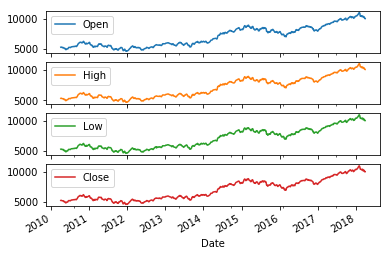

In [10]:
Moving_avg[['Open','High','Low','Close']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E02010AC8>,
      dtype=object)

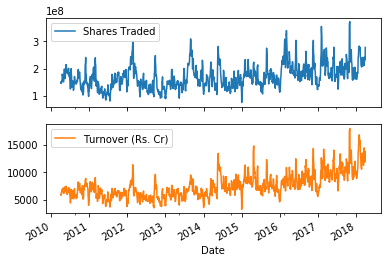

In [11]:
Moving_avg[['Shares Traded','Turnover (Rs. Cr)']].plot(subplots=True)

In [12]:
win_size=[7,30,90,365]

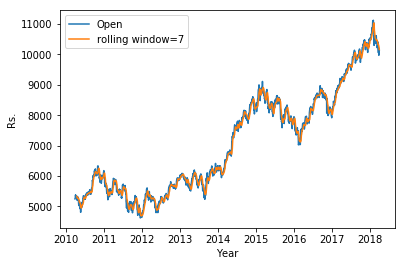

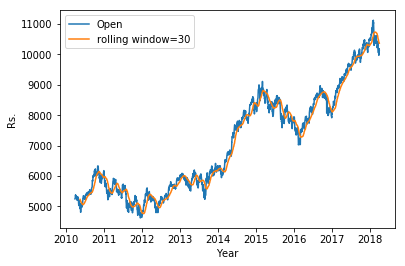

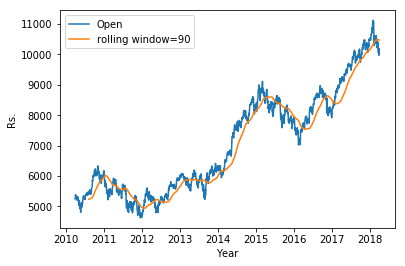

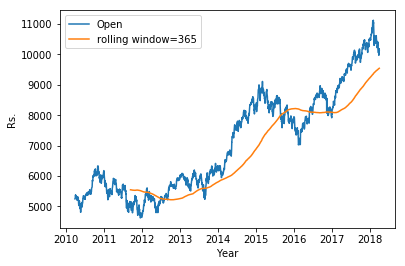

In [13]:
#plot graphs for Open column and rolling windows
for i in win_size:
    r1=Moving_avg[['Open']].rolling(window=i)
    plt.plot(Nifty_data[['Open']],label='Open')
    plt.plot(r1.mean()['Open'],label="rolling window="+str(i))
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()


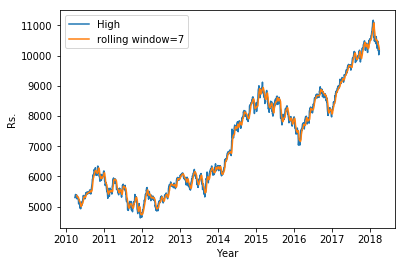

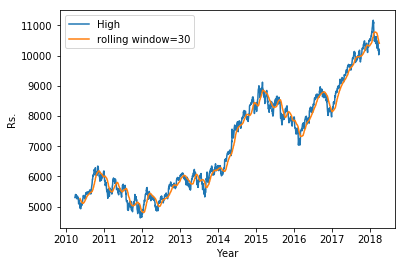

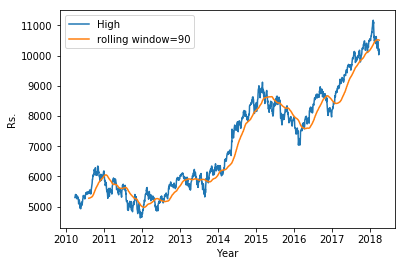

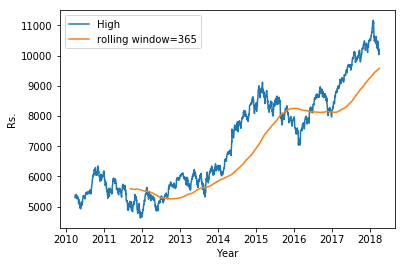

In [14]:
#plot graphs for High column and rolling windows
for i in win_size:
    r1=Moving_avg[['High']].rolling(window=i)
    plt.plot(Nifty_data[['High']],label='High')
    plt.plot(r1.mean()['High'],label='rolling window='+str(i))
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

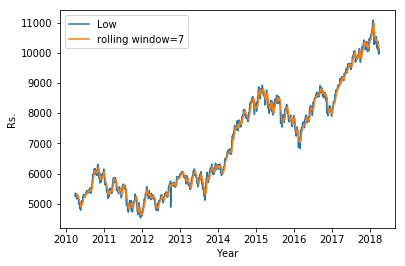

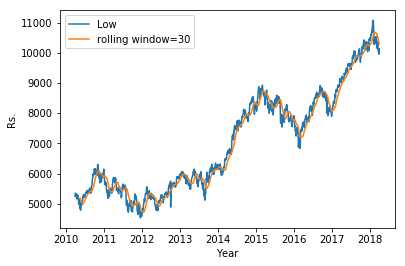

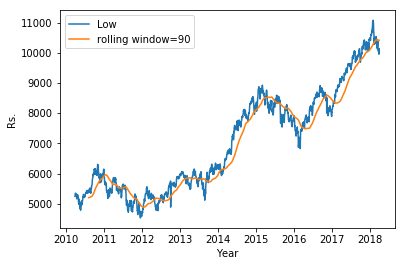

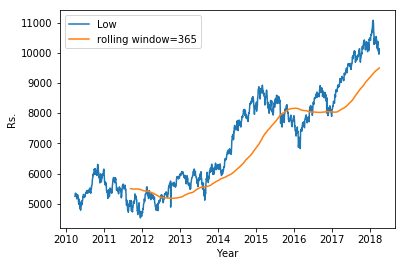

In [15]:
# plot graphs for Low column and rolling windows
for i in win_size:
    r1=Moving_avg[['Low']].rolling(window=i)
    plt.plot(Nifty_data[['Low']],label='Low')
    plt.plot(r1.mean()['Low'],label='rolling window='+str(i))
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

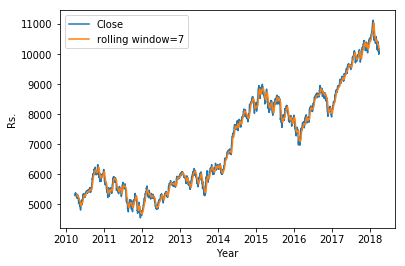

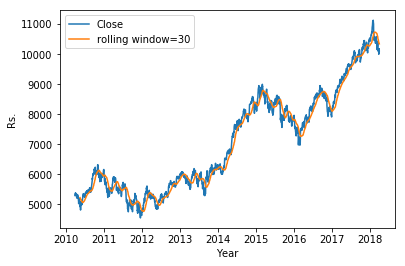

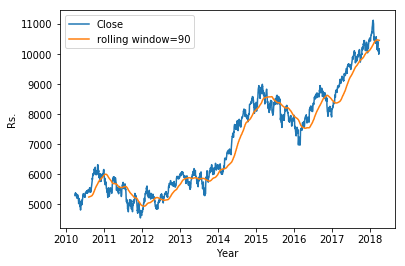

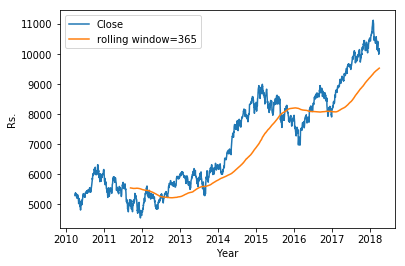

In [16]:
#plot values for Close column and rolling windows
for i in win_size:
    r1=Moving_avg[['Close']].rolling(window=i)
    plt.plot(Nifty_data[['Close']],label='Close')
    plt.plot(r1.mean()['Close'],label='rolling window='+str(i))
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

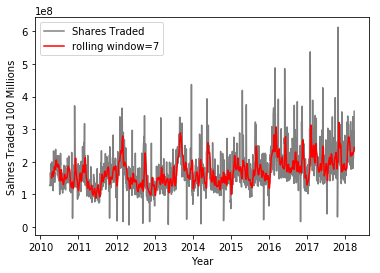

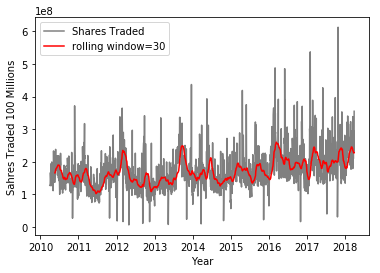

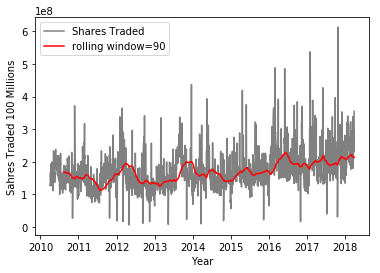

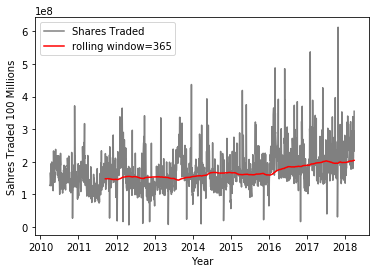

In [17]:
#plot graph for Shares Traded column and rolling windows
for i in win_size:
    r2=Moving_avg['Shares Traded'].rolling(window=i)
    plt.plot(Nifty_data['Shares Traded'],color='grey')
    plt.plot(r2.mean(),label='rolling window='+str(i),color='red')
    plt.xlabel('Year')
    plt.ylabel('Sahres Traded 100 Millions')
    plt.legend()
    plt.show()

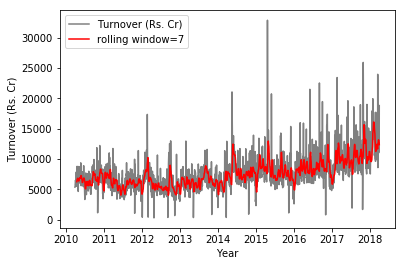

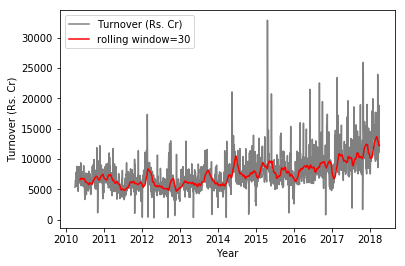

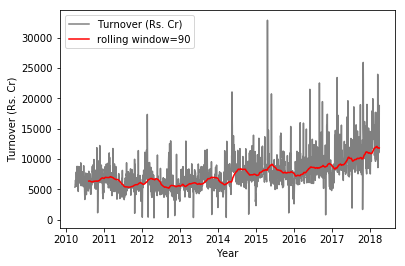

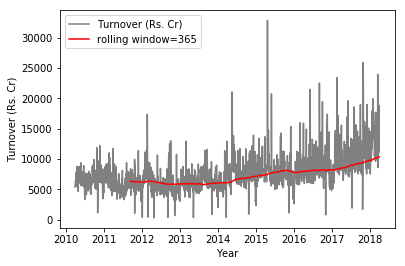

In [18]:
#plot graph for Turnover column and rolling windows
for i in win_size:
    r2=Moving_avg['Turnover (Rs. Cr)'].rolling(window=i)
    plt.plot(Nifty_data['Turnover (Rs. Cr)'],color='grey')
    plt.plot(r2.mean(),label='rolling window='+str(i),color='red')
    plt.xlabel('Year')
    plt.ylabel('Turnover (Rs. Cr)')
    plt.legend()
    plt.show()

In [19]:
import numpy as np

In [20]:
from statsmodels.tsa import stattools

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
#Calculating Autocorrelation function for each column for moving average

In [22]:
acf_Open=stattools.acf(Moving_avg['Open'])

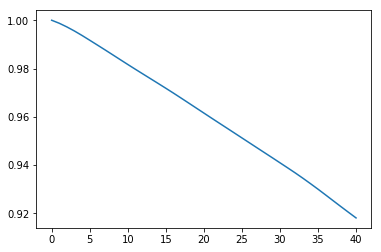

In [23]:
plt.plot(acf_Open)
plt.show()

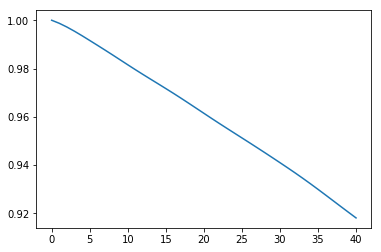

In [24]:
acf_Close=stattools.acf(Moving_avg['Close'])
plt.plot(acf_Close)
plt.show()

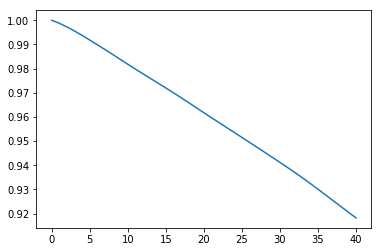

In [25]:
acf_High=stattools.acf(Moving_avg['High'])
plt.plot(acf_High)
plt.show()

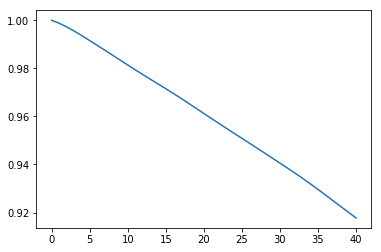

In [26]:
acf_Low=stattools.acf(Moving_avg['Low'])
plt.plot(acf_Low)
plt.show()

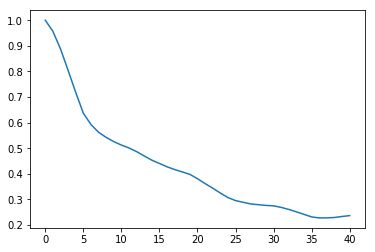

In [27]:
acf_Shares=stattools.acf(Moving_avg['Shares Traded'])
plt.plot(acf_Shares)
plt.show()

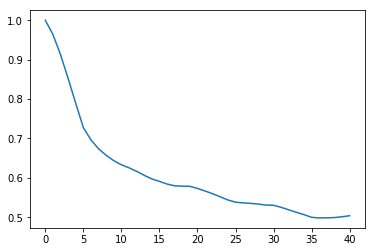

In [28]:
acf_Turnover=stattools.acf(Moving_avg['Turnover (Rs. Cr)'])
plt.plot(acf_Turnover)
plt.show()

In [29]:
#Calculating Partial Autocorrelation function for each column for moving average

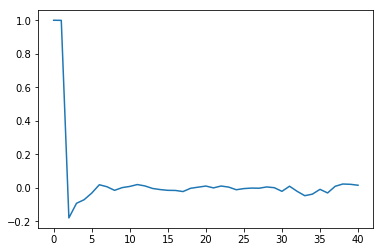

In [30]:
pacf_Open=stattools.pacf(Moving_avg['Open'])
plt.plot(pacf_Open)
plt.show()

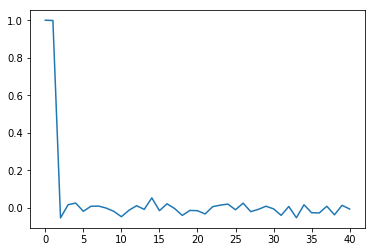

In [31]:
pacf_Close=stattools.pacf(Nifty_data['Close'])
plt.plot(pacf_Close)
plt.show()

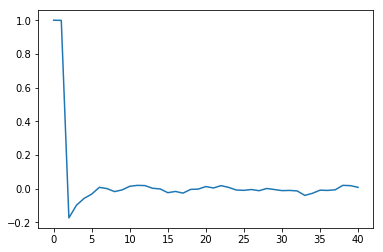

In [32]:
pacf_High=stattools.pacf(Moving_avg['High'])
plt.plot(pacf_High)
plt.show()

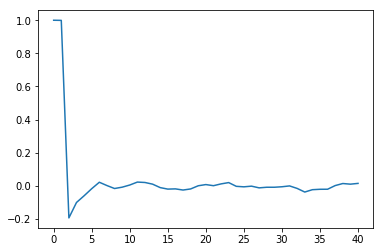

In [33]:
pacf_Low=stattools.pacf(Moving_avg['Low'])
plt.plot(pacf_Low)
plt.show()

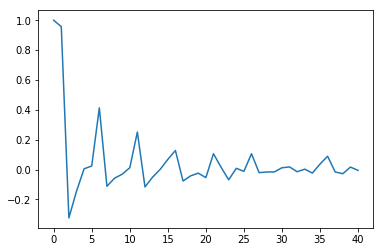

In [34]:
pacf_Shares=stattools.pacf(Moving_avg['Shares Traded'])
plt.plot(pacf_Shares)
plt.show()

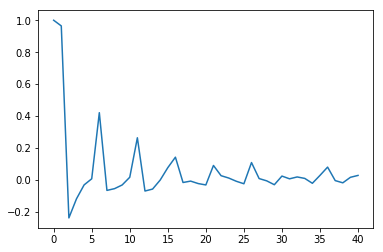

In [35]:
pacf_Turnover=stattools.pacf(Moving_avg['Turnover (Rs. Cr)'])
plt.plot(pacf_Turnover)
plt.show()

In [36]:
#pearson correlation measures the linear association between contineous varaiables
coff_corr_r1=Moving_avg.corr(method='pearson')

In [37]:
coff_corr_r1

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.999954,0.999894,0.999880,0.388875,0.740121
High,0.999954,1.000000,0.999869,0.999927,0.391522,0.742051
Low,0.999894,0.999869,1.000000,0.999942,0.385225,0.737150
Close,0.999880,0.999927,0.999942,1.000000,0.388540,0.739568
Shares Traded,0.388875,0.391522,0.385225,0.388540,1.000000,0.811145
Turnover (Rs. Cr),0.740121,0.742051,0.737150,0.739568,0.811145,1.000000


In [38]:
def Cod(Corr_coff):
    return (Corr_coff**2)*100;

In [39]:
#Cod is cofficient of determination
Cod(coff_corr_r1)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,100.000000,99.990778,99.978723,99.976095,15.122345,54.777919
High,99.990778,100.000000,99.973891,99.985308,15.328977,55.064031
Low,99.978723,99.973891,100.000000,99.988316,14.839820,54.339043
Close,99.976095,99.985308,99.988316,100.000000,15.096346,54.696078
Shares Traded,15.122345,15.328977,14.839820,15.096346,100.000000,65.795683
Turnover (Rs. Cr),54.777919,55.064031,54.339043,54.696078,65.795683,100.000000


In [40]:
coff_corr_r2=Moving_avg.corr(method='kendall')

In [41]:
coff_corr_r2

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.991487,0.987229,0.985324,0.246405,0.514356
High,0.991487,1.000000,0.986240,0.989009,0.249088,0.517127
Low,0.987229,0.986240,1.000000,0.990855,0.242898,0.509693
Close,0.985324,0.989009,0.990855,1.000000,0.246122,0.513294
Shares Traded,0.246405,0.249088,0.242898,0.246122,1.000000,0.622111
Turnover (Rs. Cr),0.514356,0.517127,0.509693,0.513294,0.622111,1.000000


In [42]:
Cod(coff_corr_r2)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,100.000000,98.304732,97.462207,97.086397,6.071529,26.456249
High,98.304732,100.000000,97.266934,97.813930,6.204486,26.742064
Low,97.462207,97.266934,100.000000,98.179295,5.899926,25.978710
Close,97.086397,97.813930,98.179295,100.000000,6.057594,26.347060
Shares Traded,6.071529,6.204486,5.899926,6.057594,100.000000,38.702191
Turnover (Rs. Cr),26.456249,26.742064,25.978710,26.347060,38.702191,100.000000


In [43]:
coff_corr_r3=Moving_avg.corr(method='spearman')

In [44]:
coff_corr_r3

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,1.000000,0.999878,0.999690,0.999672,0.361486,0.713312
High,0.999878,1.000000,0.999641,0.999797,0.365210,0.716247
Low,0.999690,0.999641,1.000000,0.999825,0.356212,0.708134
Close,0.999672,0.999797,0.999825,1.000000,0.360598,0.712007
Shares Traded,0.361486,0.365210,0.356212,0.360598,1.000000,0.815384
Turnover (Rs. Cr),0.713312,0.716247,0.708134,0.712007,0.815384,1.000000


In [45]:
Cod(coff_corr_r3)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Open,100.000000,99.975514,99.938028,99.934387,13.067222,50.881357
High,99.975514,100.000000,99.928188,99.959438,13.337843,51.300972
Low,99.938028,99.928188,100.000000,99.964964,12.688732,50.145434
Close,99.934387,99.959438,99.964964,100.000000,13.003069,50.695415
Shares Traded,13.067222,13.337843,12.688732,13.003069,100.000000,66.485074
Turnover (Rs. Cr),50.881357,51.300972,50.145434,50.695415,66.485074,100.000000


In [46]:
#calculating %jump , formula = ((p(t)/p(t-1))-1)*100
per_jump=((((Nifty_data/Nifty_data.shift(1))-1).abs())*100)
drops=['day','month','year']
per_jump=per_jump.drop(drops,1)
per_jump=per_jump.dropna()

In [47]:
per_jump=per_jump.dropna()

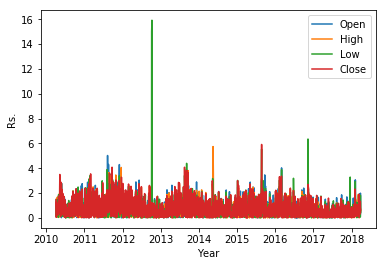

In [48]:
#plotting graphs for percentage jump
plt.plot(per_jump[['Open']],label='Open')
plt.plot(per_jump[['High']],label='High')
plt.plot(per_jump[['Low']],label='Low')
plt.plot(per_jump[['Close']],label='Close')
plt.xlabel('Year')
plt.ylabel('Rs.')
plt.legend()
plt.show()

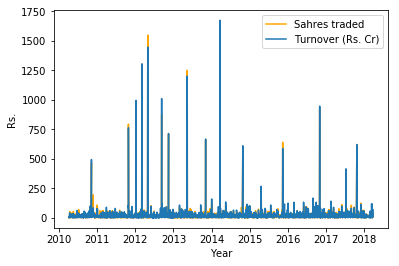

In [49]:
    plt.plot(per_jump[['Shares Traded']],label='Sahres traded',color='orange')
    plt.plot(per_jump[['Turnover (Rs. Cr)']],label='Turnover (Rs. Cr)')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

In [50]:
def Dickeyfuller(test_series):
    result = stattools.adfuller(test_series,autolag='AIC')

    print('ADF Statistic: %f' % result[0])

    print('p-value: %f' % result[1])

    print('Critical Values:')

    for key, value in result[4].items():

        print('\t%s: %.3f' % (key, value))
    
    if(result[1]>0.05):
        print("     Time series is not stationary");
    else:
        print("     Time series is stationary")

In [51]:
for i in Nifty_data[['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)']]:
    print("For Column "+i)
    Dickeyfuller(Nifty_data[i])


For Column Open
ADF Statistic: -0.306389
p-value: 0.924595
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is not stationary
For Column High
ADF Statistic: -0.277463
p-value: 0.928636
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is not stationary
For Column Low
ADF Statistic: -0.349403
p-value: 0.918210
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is not stationary
For Column Close
ADF Statistic: -0.371803
p-value: 0.914701
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is not stationary
For Column Shares Traded
ADF Statistic: -5.220330
p-value: 0.000008
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Turnover (Rs. Cr)
ADF Statistic: -3.437833
p-value: 0.009735
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary


In [52]:
Diff=Nifty_data[['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)']]-Nifty_data[['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)']].shift(1)

Diff=Diff.dropna()

In [53]:
for i in Diff.columns:
    print("For Column "+i+":")
    Dickeyfuller(Diff[i])

For Column Open:
ADF Statistic: -46.136639
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column High:
ADF Statistic: -39.387213
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Low:
ADF Statistic: -43.364970
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Close:
ADF Statistic: -41.047846
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Shares Traded:
ADF Statistic: -16.256196
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Turnover (Rs. Cr):
ADF Statistic: -16.859948
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary


In [54]:
#all the series are now stationary(There is no trend,seasonality and noise present).

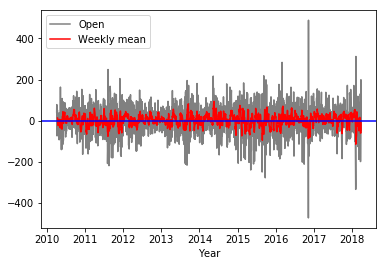

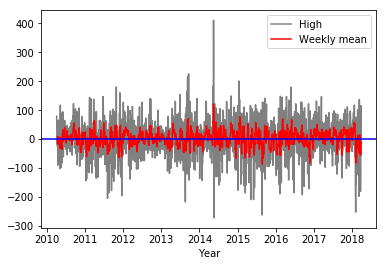

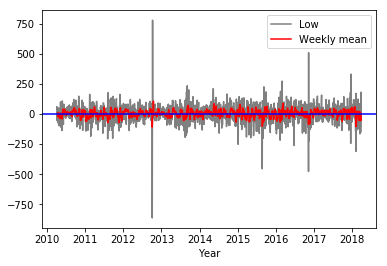

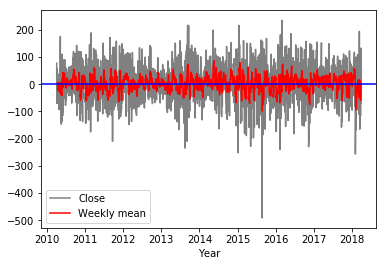

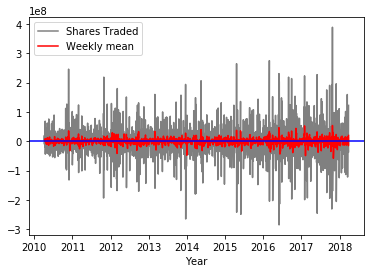

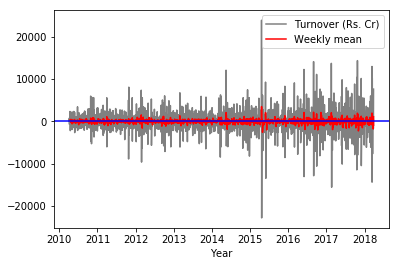

In [67]:
for j in Diff.columns:
    plt.plot(Diff[j],color='grey')
    plt.plot(Diff.rolling(window=7)[j].mean(),color='red',label='Weekly mean')
    plt.axhline(y=0,color='blue')
    plt.xlabel('Year')
    plt.legend()
    plt.show()


In [56]:
Nifty_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)',
       'day', 'month', 'year'],
      dtype='object')

In [69]:
#calculating Daily return using formula: ((p(t)-p(t-1))/p(t))-1
Daily_return=((Nifty_data[['Open', 'High', 'Low', 'Close']]-Nifty_data[['Open', 'High', 'Low', 'Close']].shift())/Nifty_data[['Open', 'High', 'Low', 'Close']])-1

In [70]:
Daily_return=Daily_return.dropna()
Daily_return.head()

,Open,High,Low,Close
Date,,,,
2010-04-05,-0.992025,-0.985319,-0.992025,-0.985489
2010-04-06,-0.985427,-0.997940,-0.988733,-1.000447
2010-04-07,-1.000736,-0.997963,-1.001244,-0.998391
2010-04-08,-0.998028,-1.002972,-1.010359,-1.013234
2010-04-09,-1.013937,-1.001153,-0.997737,-0.989313


In [74]:
for i in Daily_return.columns:
    print("For Column "+i+":")
    Dickeyfuller(Daily_return[i])

For Column Open:
ADF Statistic: -46.601386
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column High:
ADF Statistic: -39.909965
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Low:
ADF Statistic: -44.539688
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary
For Column Close:
ADF Statistic: -41.558941
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
     Time series is stationary


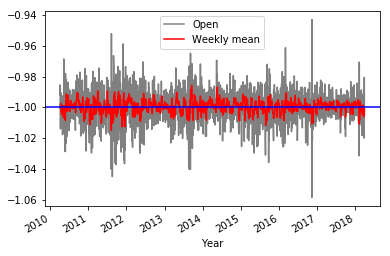

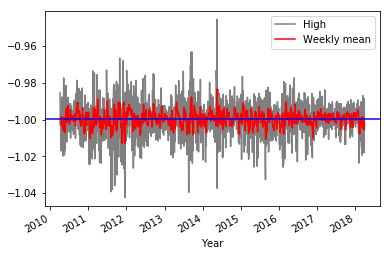

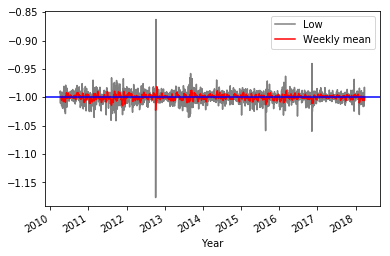

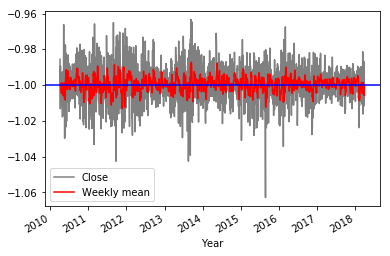

In [75]:
for k in Daily_return:
    Daily_return[k].plot(color='grey')
    Daily_return.rolling(window=7)[k].mean().plot(color='red',label='Weekly mean')
    plt.axhline(y=Daily_return[k].mean(),color='blue')
    plt.xlabel('Year')
    plt.legend()
    plt.show()